### In class demo from Spring 2018

<hr>
*(Note: If you are an SFU student you can download this notebook and open it in https://sfu.syzygy.ca, then you can execute the code and play around with it. You'll need to login with your SFU Computing ID.)*
<hr>

**Goals:**
* On assignment 5 we saw that to approximate the integral
$$\int_{0}^{\pi/2}\frac{\sin{x}}{x}~dx$$
to $15$ decimal places using the midpoint rule, it would take a value of $n$ around the order of $40$ million.  Suggesting the Midpoint Rule won't be useful. This demo will show a creative way to get the Midpoint Rule to work for us, with relatively small $n$.

* We'll see graphically the rate of convergence for Midpoint and Simpons's rule as $n$ increases, by plotting errors-vs-n on a log-log scale.


# Implementation of Approximation Methods

First we implement the approximation methods that we will use:

## <a name="mr"> Midpoint Rule: </a>##

The function `midpoint_rule` outputs the midpoint rule approximation of $\int_a^b f(x) dx$ using n partitions of the interval:

$$\int_a^bf(x)dx \approx \sum_{i=1}^n f(\overline{x}_{i-1})\Delta x,$$
where $\overline{x}_i$ is the midpoint of inteval $[x_{i-1},x_i]$, which is $\overline{x}_i=\frac{x_{i-1}+x_i}{2}$.

In [2]:
import math

def midpoint_rule(fcn,a,b,n):
# output: midpoint rule approx of int_a^b fcn(x)dx using n steps
    Deltax = (b-a)*1.0/n
    xs=[a+Deltax*i for i in range(n+1)]
    ysmid=[fcn((xs[i]+xs[i+1])/2) for i in range(n)]
    return Deltax*sum(ysmid)

#Example
n=10;
a=0
b=1
def f(x):
    return(math.sin(x))
print(midpoint_rule(f,a,b,n));

0.45988929071851814


## <a name="tr"> Trapezoid Rule: </a>##
The function `trapezoid_rule` outputs the trapezoid rule approximation of $\int_a^b f(x) dx$ using n partitions of the interval:

$$\int_a^bf(x)dx \approx \frac{\Delta x}{2}(f(x_0)+2f(x_1)+2f(x_2)+ \cdots + 2f(x_{n-1})+f(x_n)).$$

In [3]:
import math

def trapezoid_rule(fcn,a,b,n):
# output: trapezoid rule approx of int_a^b fcn(x)dx using n steps
    Deltax = (b-a)*1.0/n
    coeffs = [2]*(n-1)
    coeffs = [1]+coeffs+[1]
    valsf = [fcn(a+Deltax*i) for i in range(n+1)]
    return (Deltax/2)*sum([coeffs[i]*valsf[i] for i in range(n+1)])

#Example
n=10;
a=0
b=1
def f(x):
    return(math.sin(x))
print(trapezoid_rule(f,a,b,n));

0.4593145488579764


## <a name="sr"> Simpsons Rule:</a> ##

The function `simpsons_rule` outputs the Simpson's Rule approximation of $\int_a^b f(x) dx$ using n partitions
of the interval:
				
$$\int_a^bf(x)dx \approx \frac{\Delta x}{3}(f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+ \cdots + 2f(x_{n-2})+4f(x_{n-1})+f(x_n)).$$
				
**Note:** n must be even.

In [4]:
import math

def simpsons_rule(fcn,a,b,n):
# output: simpsons rule approx of int_a^b fcn(x)dx using n steps (n must be an even integer)
    Deltax = (b-a)*1.0/n
    n2=int(n/2)
    coeffs = [4,2]*n2
    coeffs = [1] +coeffs[:n-1]+[1]
    valsf = [fcn(a+Deltax*i) for i in range(n+1)]
    return (Deltax/3)*sum([coeffs[i]*valsf[i] for i in range(n+1)])

#Example
n=10;
a=0
b=1
def f(x):
    return(math.sin(x))
print(simpsons_rule(f,a,b,n));

0.4596979498238206


### Piecewise Defined Functions: ###

Sometimes you may find the need to define $f$ as a piecewise defined function.  For example, suppose you are trying to approximate the integral $\int_{0}^{10} f(x)~dx$ where
$$f(x)=\begin{cases}
\displaystyle x,&x\le 5\\
x^2,&x > 5\\
\end{cases}
$$ (not that you would not need to approximate in this case since you can easily find antiderivates, but we'll just use it as a simple example).


We can replace the line `f(x) = ...` in the code above with a python function defining $f$:

```python
def f(x):
    if x<=5:
        return x;
    elif x>5:   # elif means "else if"
        return x^2;
```

Try to cut-and-paste this code to replace the function $f$ in Simpson's Rule above.

<hr>

# Class Demonstration:

Let's investigate a 'smarter' midpoint rule for $$f(x)=\frac{\sin{x}}{x}.$$

That is, we want a method that will give us a very good approximation with a relatively small value for $n$.

In [5]:
# we'll need to import a few mathematical libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

### Richardson Extrapolation with Midpoint Rule:

Using the midpoint rule to approximate the following integral
$$\int_{0}^{\pi/2} \frac{\sin(x)}{x} ~dx$$
to $15$ decimal places requires $n$ to be significantly large. Error bound estimates suggest $n$ to be at least 20 million.

However, using Richardson Extrapolation we can take a weighted average of $M_n$ and $M_{2n}$, for $n$ relatively small (i.e. $n=2000$) and get $15$ decimal places.

Let $I_{exact}$ denote the exact value of the integral, and $Err_n$ the error in the n-th approximation.  Then

\begin{align*}
I_{exact} &= M_{n} + Err_n\\
I_{exact} &= M_{2n} + Err_{2n} \simeq M_{2n} + \frac{Err_{n}}{4}
\end{align*}

Therefore,
\begin{align*}
4I_{exact} - I_{exact} & = 4\left(M_{2n} + \frac{Err_{n}}{4}\right) - (M_{n} + Err_{n})\\
3I_{exact} & = 4M_{2n} - M_{n}
\end{align*}
and so
$$I_{exact} \simeq \left(\frac{4}{3}\right)M_{2n} + \left(\frac{-1}{3}\right)M_{n}.$$

This gives a better approximation of $I_x$ than just using $n$ and $2n$ alone. 


In [10]:
def f(x):
    if x==0:
        return(1)
    else:
        return(np.sin(x)/x)
a,b = 0, np.pi/2

In [7]:
n=2000
(4/3)*midpoint_rule(f,a,b,2*n)-(1/3)*midpoint_rule(f,a,b,n)

1.3707621681544886

In [16]:
simpsons_rule(f,a,b,2000)

1.370762168154486

Comparing with the actual value below we see we have obtained $16$ decimal places.

In [8]:
integrate.quad(f,a,b)[0]

1.3707621681544881

### Richardson Extrapolation with Simpson's Rule:
We could do the same analysis using Simpson's rule.  In this case we use the fact that doubling $n$ reduces that error by a factor of $2^4 = 16$.  This gives

$$I_{exact} \simeq \left(\frac{16}{15}\right)S_{2n} + \left(\frac{-1}{15}\right)S_{n}.$$

The next line shows that we can more than 16 decimal places of accuracy using $n$ and $2n$, where $n=100$.

In [9]:
n=100
(16/15)*simpsons_rule(f,a,b,2*n)-(1/15)*simpsons_rule(f,a,b,n)

1.3707621681544886

<hr>

## Convergence rate for Approximation Methods

As $n$ increases we expect $S_n$ and $M_n$ to get closer to the actual values.  Can we see the rate at which these approximations converge to the actual values?

From the error bound estimate for Simpon's rule 

$$|E_S| \le \frac{k(b-a)^5}{180n^4} $$

we infer that $E_S$ is proportional to $n^{-4}$, therefore plotting $\log{E_S}$ versus $\log{n}$ should produce something close to a line of slope $-4$.  We now construct this plot to see this.

In [10]:
def f(x):                      # define our function f
    return(np.exp(np.cos(x)))  # use exp and cos from numpy's math library 
a,b = 0,1                      # set the limits of integration

In [11]:
Ival=integrate.quad(f,a,b)[0]  # this is what we'll use for the *exact* value of the integral

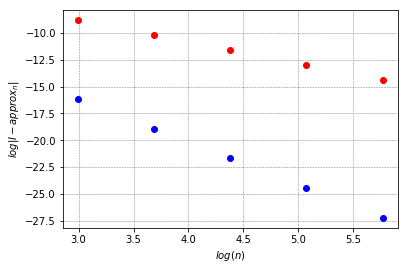

slopes:  [-4.000515590129417, -4.000127253447741, -4.000058127895366, -4.000547200856506]


In [12]:
n_vals=[20,40,80,160,320]  # a list of sample n values for using in Simpon's rule
Err_vals = [abs(Ival-simpsons_rule(f,a,b,n)) for n in n_vals]   # list of errors:  |Ix - S_n| for each n

#we'll also look at the errors in the midpoint rule
Err_vals_mid = [abs(Ival-midpoint_rule(f,a,b,n)) for n in n_vals]

# building a plot
plt.plot(np.log(n_vals),np.log(Err_vals),'bo')      # blue points are from Simpson's rule
plt.plot(np.log(n_vals),np.log(Err_vals_mid),'ro')  # red points are from midpoint rule
plt.xlabel('$log(n)$')                              # label for x-axis
plt.ylabel('$log|I-approx_n|$')                     # label for y-axis
plt.grid(color='tab:gray', linestyle='--', linewidth=0.5)
plt.show()

# blue point look like they live on a line, lets look at slopes between consecutive points
n_vals_l = np.log(n_vals)       
Err_vals_l = np.log(Err_vals)
slopes=[(Err_vals_l[i+1]-Err_vals_l[i])/(n_vals_l[i+1]-n_vals_l[i]) for i in range(len(n_vals)-1)]
print("slopes: ", slopes)


The slopes between consecutive points using Simpson's rule is $-4$.  The illustrates that the rate at which is $S_n$ is converging to $I_x$ is of order $n^{-4}$, which is what the errors bound would suggest.